# 08. Word2Vec

단어 간의 유사성을 측정하기 위해 분포 가설을 기반으로 개발됐다



분포 가설이란 같은 문맥에서 함께 자주 나타나는 단어들은 서로 유사한 의미를 가질 가능성이 높다는 가정이다

분포 가설은 단어 간의 동시 발생 확률 분포를 이용해 단어 간의 유사성을 측정한다

이러한 가정을 통해 단어의 분산 표현을 학습할 수 있다

분산 표현이란 단어를 고차원 벡터 공간에 매핑하여 단어의 의미를 담는 것을 의미한다

분포 가설에 따라 단어의 의미는 문맥상 분포적 특성을 통해 나타난다

즉 유사한 문맥에서 등장하는 단어는 비슷한 벡터 공간상 위치를 갖게 된다

즉 벡터 공간에서 서로 가까운 위치에 표현된다

이러한 방법으로 빈도 기반의 벡터화 기법에서 발생했던 단어의 의미 정보를 저장하지 못하는 한계를 극복했으며, 대량의 텍스트 데이터에서 단어 간의 관계를 파악하고 벡터 공간상에서 유사한 단어를 군집화 해 단어의 의미 정보를 효과적으로 표현한다

이러한 분산 표현 방식은 다양한 자연어 처리 작업에서 높은 성능을 보여주며, 다운스트림 작업에서 더 뛰어난 성능을 보인다

### 단어 벡터화

단어를 벡터화하는 방법은 크게 희소 표현과 밀집 표현으로 나눌 수 있다 

원-핫 인코딩, TF-IDF 등의 빈도 기반 방법은 희소 표현이며, Word2Vec은 밀집 표현이다

원-핫 인코딩과 TF-IDF와 같은 방법은 대부분의 벡터 요소가 0으로 표현되는 희소 표현 방법이다

예를 들어, 모델의 단어 사전이 5000개의 단어로 이루어졌다면 10개의 토큰으로 이루어진 입력 텍스트를 원-핫 인코딩으로 표현하면 최소한 4990개의 0이 포함된 벡터로 표현된다

이런 방법은 단어 사전의 크기가 커지면 벡터의 크기도 커지므로 공간적 낭비가 발생한다

또한 단어 간의 유사성을 반영하지 못하고, 벡터 간의 유사성을 계산하는 데도 많은 비용이 발생한다

이에 비해 Word2Vec과 같은 밀집 표현은 단어를 고정된 크기의 실수 벡터로 표현하기 때문에 단어 사전의 크기가 커지더라도 벡터의 크기가 커지지 않는다

벡터 공간상에서 단어 간의 거리를 효과적으로 계산할 수 있으며, 벡터의 대부분이 0이 아닌 실수로 이루어져 있어, 효율적으로 공간을 활용할 수 있다

밀집 표현 벡터화는 학습을 통해 단어를 벡터화하기 때문에 단어의 의미를 비교할 수 있다

밀집 표현된 벡터를 단어 임베딩벡터라고 하며, Word2Vec은 대표적인 단어 임베딩 기법 중 하나다

Word2Vec은 밀집 표현을 위해 CBoW와 Skip-gram이라는 두 가지 방법을 사용한다

### CBoW

주변에 있는 단어를 가지고 중간에 있는 단어를 예측하는 방법

중심 단어는 예측해야 할 단어를 의미하며, 예측에 사용되는 단어들을 주변 단어라고 한다

중심 단어를 맞추기 위해 몇 개의 주변 단어를 고려할지를 정해야 하는데, 이 범위를 윈도라고 한다

이 윈도를 활용해 주어진 하나의 문장에서 첫 번째 단어부터 중심 단어로 하여 마지막 단어까지 학습한다

학습을 위해 윈도를 이동해 가며 학습하는데 이러한 방법을 슬라이딩 윈도라 한다

CBoW는 슬라이딩 윈도를 사용해 한 번의 학습으로 여러 개 중심 단어와 그에 대한 주변 단어를 학습할 수 있다

윈도 크기가 2일 떄

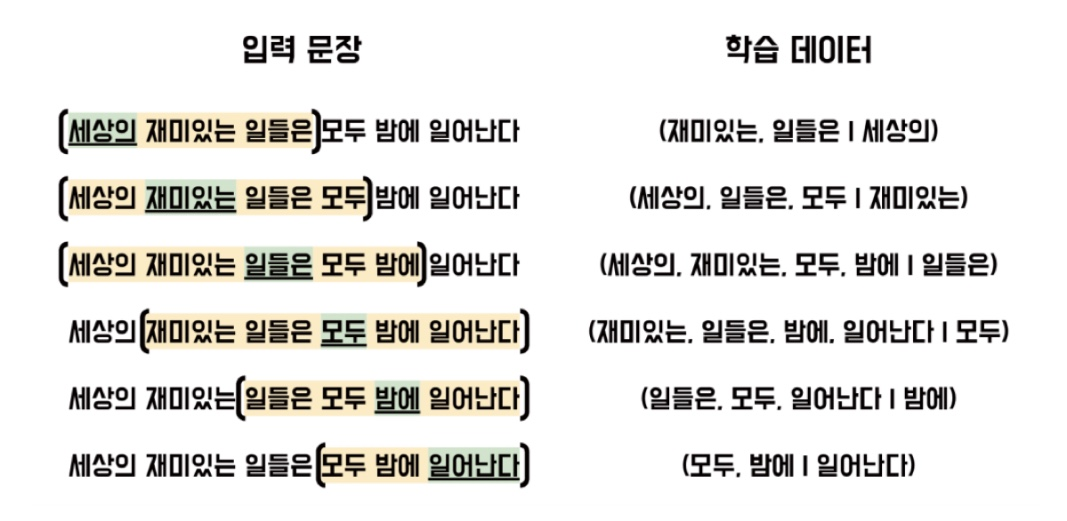

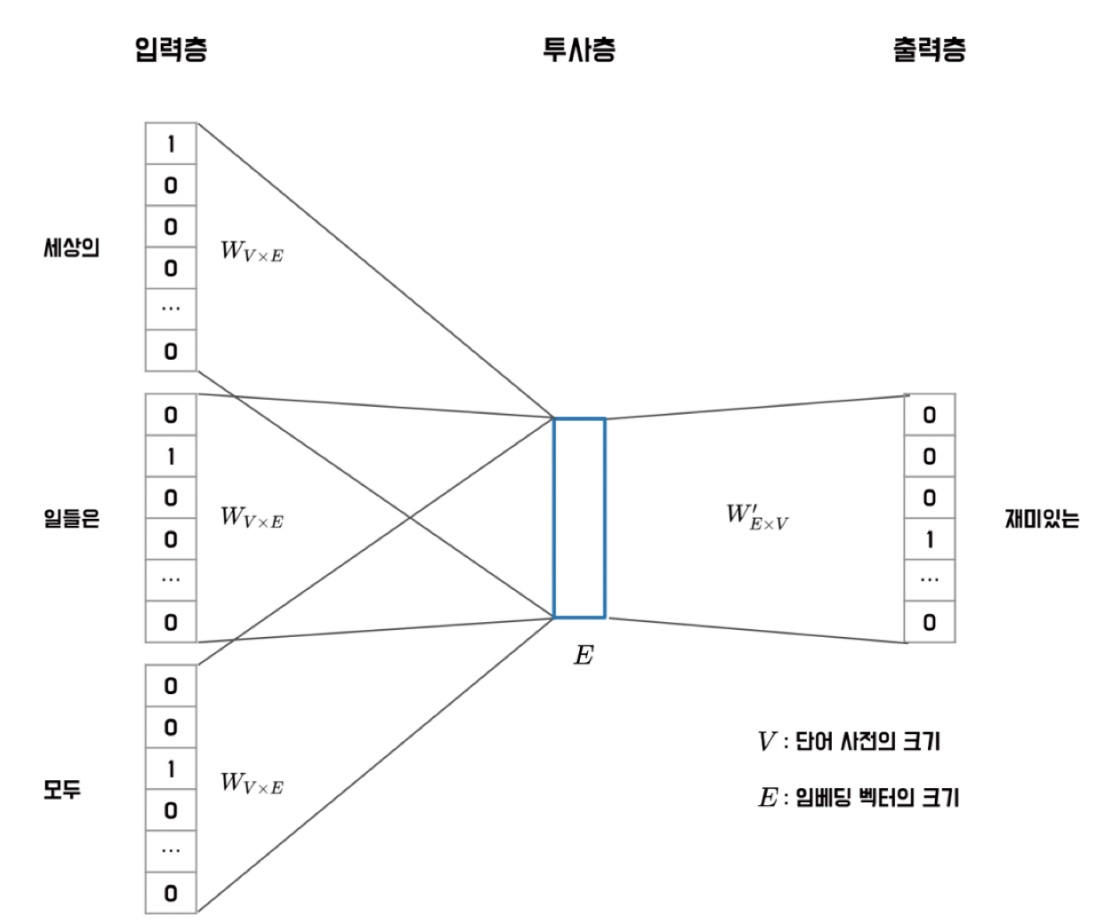

CBoW 모델은 각 입력 단어의 원-핫 벡터를 입력값으로 받는다

입력 문장 내 모든 단어의 임베딩 벡터를 평균 내어 중심 단어의 임베딩 벡터를 예측한다

입력단어는 원-핫 벡터로 표현되어 투사층에 입력된다

투사층이란 원-핫 벡터의 인덱스에 해당하는 임베딩 벡터를 반환하는 순람표 구조가 된다

투사층을 통과하면 각 단어는 임베딩 벡터로 변환된다

단어의 임베딩 벡터를 평균값을 계산한다

계산된 평균 벡터를 가중치 행렬과 곱하면 벡터를 얻는다

이 벡터에 소프트맥스 함수를 이용해 중심 단어를 예측한다

### Skip-gram

CBoW와 반대로 중심 단어를 입력으로 받아서 주변 단어를 예측하는 모델이다

따라서 중심 단어를 기준으로 양쪽으로 윈도 크기만큼의 단어들을 주변 단어로 삼아 훈련 데이터 세트를 만든다

이때 중심 단어와 각 주변 단어를 하나의 쌍으로 하여 모델을 학습시킨다


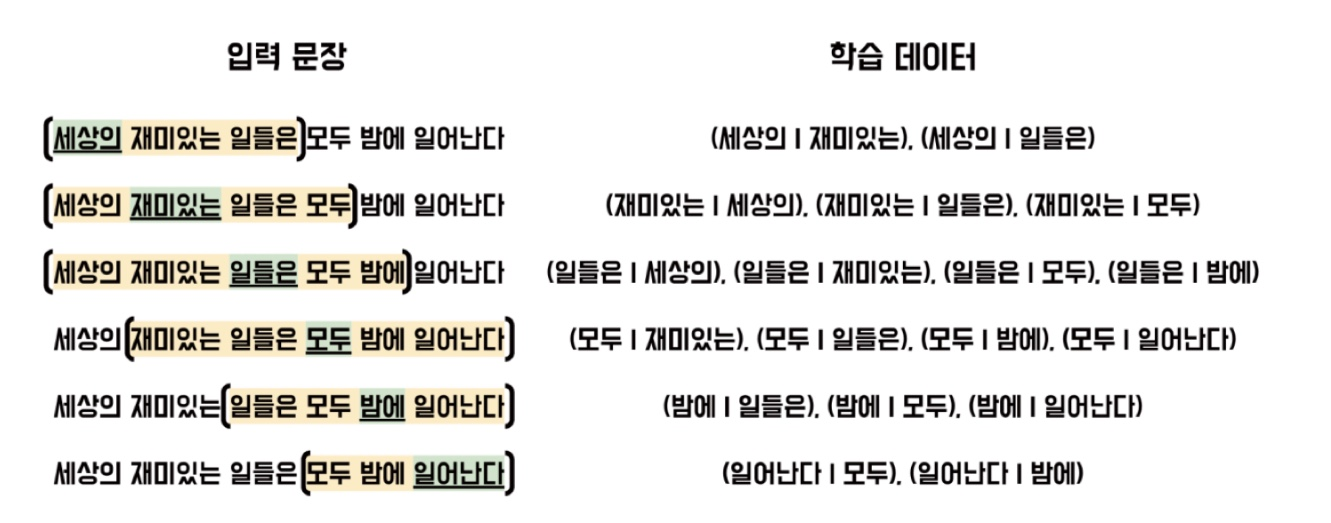
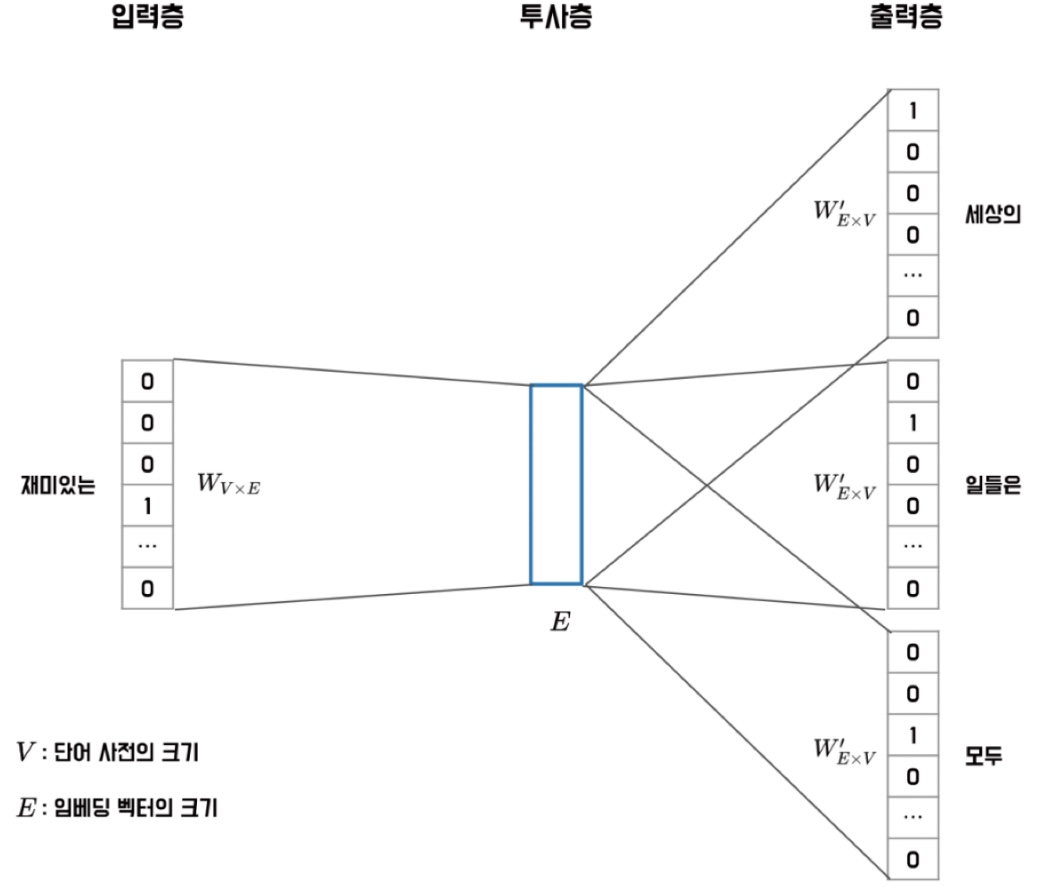

Skip-gram과 CBoW는 학습 데이터의 구성 방식에 차이가 있다

CBoW는 하나의 윈도에서 하나의 학습 데이터가 만들어지는 반면, Skip-gram은 중심 단어와 주변 단어를 하나의 쌍으로 하여 여러 학습 데이터가 만들어진다

이러한 차이 때문에 Skip-gram은 하나의 중심 단어를 통해 여러 개의 주변 단어를 예측하므로 더 많은 학습 데이터 세트를 추출할 수 있으며, 일반적으로 CBoW보다 더 뛰어난 성능을 보인다

또한 비교적 드물게 등장하는 단어를 더 잘 학습할 수 있게 되고 단어 벡터 공간에서 더 유의미한 거리 관계를 형성할 수 있다

CBoW와 마찬가지로 입력 단어의 원-핫 벡터를 투사층에 입력하여 해당 단어의 임베딩 벡터를 가져온다

입력 단어의 임베딩과 가중치의 곱셈을 통해 벡터를 얻고 이 벡터에 소프트맥스 연산을 취함으로써 주변 단어를 예측한다



소프트맥스 연산은 모든 단어를 대상으로 내적 연산을 수행한다

말뭉치의 크기가 커지면 필연적으로 단어 사전의 크기도 커지므로 대량의 말뭉치를 통해 Word2Vec 모델을 학습할 떄 학습속도가 느려지는 단점이 있다

이를 해결하기 위해 계층적 소프트맥스와 네거티브 샘플링 기법을 적용해 학습속도가 느려지는 문제를 완화한다

### 계층적 소프트맥스

계층적 소프트맥스는 출력층을 이진트리 구조로 표현해 연산을 수행한다

이때 자주 등장하는 단어일수록 트리의 상위 노드에 위치하고 드물게 등장하는 단어일수록 하위 노드에 배치된다

이렇게 확률을 계산하면 일반적인 소프트맥스 연산에 비해 빠른 속도와 효율성을 보인다

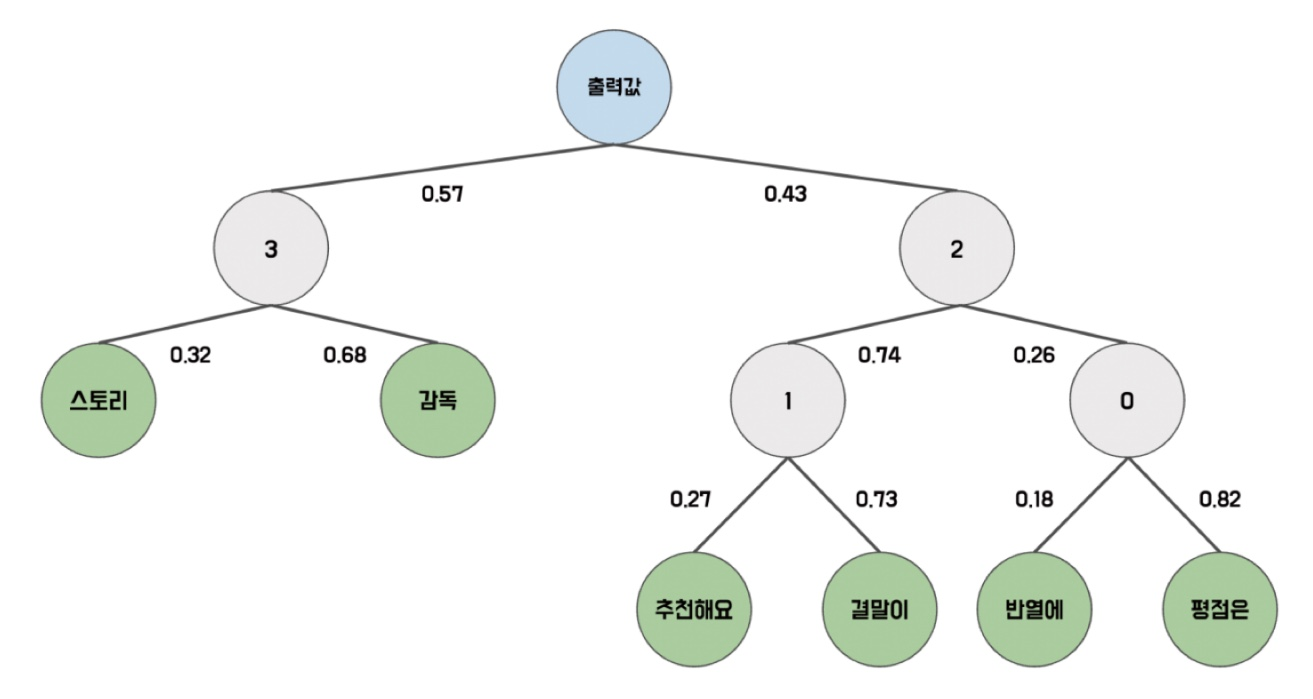

각 노드는 학습 가능한 벡터를 가지며, 입력값은 해당 노드의 벡터와 내적값을 계산한 후 시그모이드 함수를 통해 확률을 계산한다

잎 노드는 가장 깊은 노드로, 각 단어를 의미하며 모델은 각 노드의 벡터를 최적화하여 단어를 잘 예측할 수 있게 한다

각 단어의 확률은 노드의 확률을 곱해서 구할 수 있다

### 네거티브 샘플링

Word2Vec 모델에서 사용되는 확률적인 샘플링 기법으로 전체 단어 집합에서 일부 단어를 샘플링하여 오답 단어로 사용한다

학습 윈도 내에 등장하지 않는 단어를 n개 추출하여 정답 단어와 함께 소프트맥스 연산을 수행한다

이를통해 전체 단어의 확률을 계산할 필요 없이 모델을 효율적으로 학습할 수 있다

이때 추출할 단어 n은 일반적으로 5 ~20개를 사용한다

네거티브 샘플링에서는 입력 단어 쌍이 데이터로부터 추출된 단어 쌍인지, 아니면 네거티브 샘플링으로 생성된 단어 쌍인지 이진 분류를 한다

이를 위해 로지스틱 회귀 모델을 사용하며, 이 모델의 학습 과정에서는 추출할 단어의 확률 분포를 구하기 위해 각 단어에 대한 가중치를 학습한다

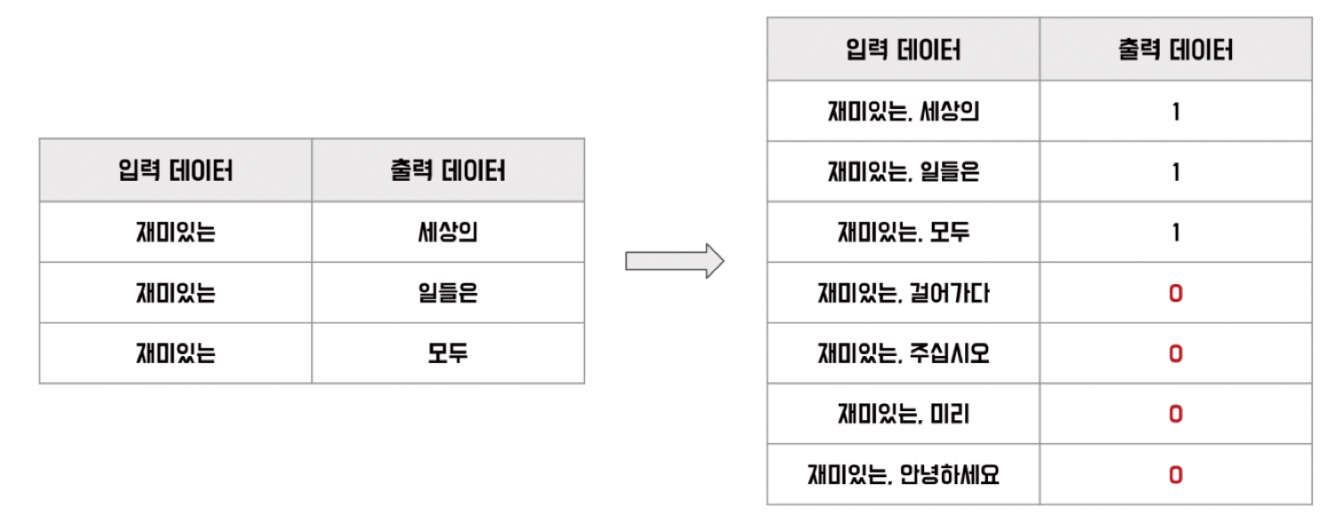

네거티브 샘플링 모델에서는 입력 단어의 임베딩과 해당 단어가 맞는지 여부를 나타내는 레이블(1 또는 0)을 가져와 내적 연산을 수행한다

내적 연산을 통해 얻은 값은 시그모이드 함수를 통해 확률적으로 변환된다

이때 레이블이 1인 경우 해당 확률값이 높아지도록, 레이블이 0인 경우 해당 확률값이 낮아지도록 모델의 가중치가 최적화된다

### 실습

임베딩 클래스는 단어나 범주형 변수와 같은 이산 변수를 연속적인 벡터 형태로 변환해 사용할 수 있다

연속적인 벡터 표현은 모델이 학습하는 동안 단어의 의미와 관련된 정보를 포착하고, 이를 기반으로 단어 간의 유사도를 계산한다

#### 기본 Skip-gram 클래스

In [1]:
from torch import nn


class VanillaSkipgram(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.embedding = nn.Embedding(
            num_embeddings=vocab_size,
            embedding_dim=embedding_dim
        )
        self.linear = nn.Linear(
            in_features=embedding_dim,
            out_features=vocab_size
        )

    def forward(self, input_ids):
        embeddings = self.embedding(input_ids)
        output = self.linear(embeddings)
        return output

계층적 소프트맥스나 네거티브 샘플링과 같은 효율적인 기법을 사용하지 않은 형식의 Skip-gram 모델은 간단히 구현할 수 있다

이 모델은 단순히 입력 단어와 주변 단어를 룩업 테이블에서 가져와서 내적을 계산한 다음, 손실 함수를 통해 예측 오차를 최소화하는 방식으로 학습된다

#### 데이터세트 전처리

In [2]:
import pandas as pd
from Korpora import Korpora
from konlpy.tag import Okt


corpus = Korpora.load("nsmc")
corpus = pd.DataFrame(corpus.test)

tokenizer = Okt()
tokens = [tokenizer.morphs(review) for review in corpus.text]
print(tokens[:3])


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : e9t@github
    Repository : https://github.com/e9t/nsmc
    References : www.lucypark.kr/docs/2015-pyconkr/#39

    Naver sentiment movie corpus v1.0
    This is a movie review dataset in the Korean language.
    Reviews were scraped from Naver Movies.

    The dataset construction is based on the method noted in
    [Large movie review dataset][^1] from Maas et al., 2011.

    [^1]: http://ai.stanford.edu/~amaas/data/sentiment/

    # License
    CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
    Details in https://creativecommons.org/publicdomain/zero/1.0/

[Korpora] Corpus `nsmc` is already installed at C:\Users\yjpak\Korpora\nsmc\ratings_train.txt
[Korpora] Corpus `nsmc` is already installed at C:\Users\yjp

#### 단어 사전 구축

In [3]:
from collections import Counter


def build_vocab(corpus, n_vocab, special_tokens):
    counter = Counter()
    for tokens in corpus:
        counter.update(tokens)
    vocab = special_tokens
    for token, count in counter.most_common(n_vocab):
        vocab.append(token)
    return vocab


vocab = build_vocab(corpus=tokens, n_vocab=5000, special_tokens=["<unk>"])
token_to_id = {token: idx for idx, token in enumerate(vocab)}
id_to_token = {idx: token for idx, token in enumerate(vocab)}

print(vocab[:10])
print(len(vocab))

['<unk>', '.', '이', '영화', '의', '..', '가', '에', '...', '을']
5001


okt 토크나이저를 통해 토큰화된 데이터를 활용해 단어 사전을 구축

n_vocab 매개변수는 구축할 단어사전의 크기를 의미



#### Skip - gram의 단어 쌍 추출

In [4]:
def get_word_pairs(tokens, window_size):
    pairs = []
    for sentence in tokens:
        sentence_length = len(sentence)
        for idx, center_word in enumerate(sentence):
            window_start = max(0, idx - window_size)
            window_end = min(sentence_length, idx + window_size + 1)
            center_word = sentence[idx]
            context_words = sentence[window_start:idx] + sentence[idx+1:window_end]
            for context_word in context_words:
                pairs.append([center_word, context_word])
    return pairs


word_pairs = get_word_pairs(tokens, window_size=2)
print(word_pairs[:5])

[['굳', 'ㅋ'], ['ㅋ', '굳'], ['뭐', '야'], ['뭐', '이'], ['야', '뭐']]


토큰을 입력받아 Skip-gram 모델의 입력 데이터로 사용할 수 있게 전처리 한다

window_size는 주변 단어를 몇 개까지 고려할 것인지를 설정한다

각 문장에서는 중심 단어와 주변 단어를 고려하여 쌍을 생성

idx는 현재 단어의 인덱스를 나타내며 center_word는 중심 단어를 나타낸다

그리고 window_start와 window_end는 현재 단어에서 얼마나 멀리 떨어진 주변 단어를 고려할 것인지 결정한다

이때  window_start와 window_end는 문장의 경계를 넘어가는 경우가 없게 조정한다

임베딩 층은 단어의 인덱스를 입력으로 받기 때문에 단어 쌍을 인덱스 쌍으로 변환해야 한다

#### 인덱스 쌍 변환

In [5]:
def get_index_pairs(word_pairs, token_to_id):
    pairs = []
    unk_index = token_to_id["<unk>"]
    for word_pair in word_pairs:
        center_word, context_word = word_pair
        center_index = token_to_id.get(center_word, unk_index)
        context_index = token_to_id.get(context_word, unk_index)
        pairs.append([center_index, context_index])
    return pairs


index_pairs = get_index_pairs(word_pairs, token_to_id)
print(index_pairs[:5])

[[595, 100], [100, 595], [77, 176], [77, 2], [176, 77]]


생성된 단어 쌍을 토큰 인덱스 쌍으로 변환한다

앞서 생성한 word_pairs와 단어와 단어에 해당하는 ID를 매핑한 딕셔너리인 token_to_id로 인덱스 쌍을 생성한다

딕셔너리의 get 메서드로 토큰이 단어 사전 내에 있으면 해당 토큰의 인덱스를 반환하고, 단어 사전 내에 없다면 <unk> 토큰의 인덱스를 반환

이렇게 생성된 인덱스 쌍은 Skip-gram 모델의 입력 데이터로 사용된다

#### 데이터로더 적용

In [6]:
import torch
from torch.utils.data import TensorDataset, DataLoader


index_pairs = torch.tensor(index_pairs)

center_indexs = index_pairs[:, 0]
contenxt_indexs = index_pairs[:, 1]

dataset = TensorDataset(center_indexs, contenxt_indexs)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

index_pairs는 get_index_pairs 함수에서 생성된 중심 단어와 주변 단어 토큰의 인덱스 쌍으로 이루어진 리스트이며 이 리스트를 텐서 형식으로 변환한다

그 다음 중심단어와 주변단어로 나눠 데이터세트로 변환

#### Skip-gram 모델 준비 작업

In [7]:
from torch import optim


device = "cuda" if torch.cuda.is_available() else "cpu"
word2vec = VanillaSkipgram(vocab_size=len(token_to_id), embedding_dim=128).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(word2vec.parameters(), lr=0.1)

VanillaSkipgram 클래스의 vocab_size에 전체 단어 집합의 크기를 전달하고 임베딩크기는 128로 할당

#### 모델 학습

In [8]:
for epoch in range(10):
    cost = 0.0
    for input_ids, target_ids in dataloader:
        input_ids = input_ids.to(device)
        target_ids = target_ids.to(device)

        logits = word2vec(input_ids)
        loss = criterion(logits, target_ids)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(dataloader)
    print(f"Epoch : {epoch+1:4d}, Cost : {cost:.3f}")

Epoch :    1, Cost : 6.198
Epoch :    2, Cost : 5.980
Epoch :    3, Cost : 5.931
Epoch :    4, Cost : 5.901
Epoch :    5, Cost : 5.879
Epoch :    6, Cost : 5.861
Epoch :    7, Cost : 5.847
Epoch :    8, Cost : 5.834
Epoch :    9, Cost : 5.822
Epoch :   10, Cost : 5.812


#### 임베딩 값 추출

In [9]:
token_to_embedding = dict()
embedding_matrix = word2vec.embedding.weight.detach().cpu().numpy()

for word, embedding in zip(vocab, embedding_matrix):
    token_to_embedding[word] = embedding

index = 30
token = vocab[30]
token_embedding = token_to_embedding[token]
print(token)
print(token_embedding)

연기
[-0.675513   -0.8798672   1.8125309  -0.16373356 -1.5437499   0.8828354
 -0.61402506  0.15881695  1.4814935  -0.77040315 -0.57062215 -0.30218756
 -0.6915136  -0.53993714 -1.6187962  -1.4024267  -1.4273604   1.2191869
  1.8890982  -1.2260383  -2.0010657   0.0039513   1.1848707   0.48373413
  1.3220351   0.47075072 -0.6071185  -0.35144883 -0.35507625 -2.0652416
 -0.74460316 -0.31651717 -0.07991967 -1.054871   -0.23679674  0.30252025
 -0.25122204 -0.67389315  1.4567349   0.21522172 -0.20605174 -0.3171526
 -0.77553535  1.9559833   1.1041048   0.2558919   0.6789992  -0.10091873
  1.4618597  -0.17457275  0.19856776 -0.5612313   0.04508983 -1.3777037
  1.2062435  -0.26546213 -0.74114794  0.05125099  0.62375927 -1.0020703
  0.5957871  -1.4505357   0.39298424 -0.02059855 -0.7674959   0.08372649
  0.42981005 -1.4524043  -1.1075387   1.4321742  -1.0104054   1.2244998
  0.9733198   0.3365211   0.08698967 -0.6849439  -0.26344782  0.8313935
 -0.23869154 -0.73553586  1.5312219   0.35351145  0.0239

Word2Vec 모델의 임베딩 행렬을 이용해 각 단어의 임베딩 값을 매핑하고, 인덱스 30값의 단어와 임베딩 값을 출력한다

이 임베딩 값으로 단어 간의 유사도를 확인할 수 있다

임베딩의 유사도를 측정할 때는 코사인 유사도가 가장 일반적으로 사용된다

코사인 유사도는 두 벡터간의 각도를 이용하여 유사도를 계산하며, 두 벡터가 유사할 수록 1에 가까워지고, 다를 수록 0에 가까워진다

두 벡터 간의 코사인 유사도는 두 벡터의 내적을 벡터의 크기(유클리드 노름)의 곱으로 나누어 계산할 수 있다

코사인 유사도는 임베딩 공간에서 단어 간의 유사도를 측정하는 데 매우 유용하다

#### 단어 임베딩 유사도 계산

In [10]:
import numpy as np
from numpy.linalg import norm


def cosine_similarity(a, b):
    cosine = np.dot(b, a) / (norm(b, axis=1) * norm(a))
    return cosine

def top_n_index(cosine_matrix, n):
    closest_indexes = cosine_matrix.argsort()[::-1]
    top_n = closest_indexes[1 : n + 1]
    return top_n


cosine_matrix = cosine_similarity(token_embedding, embedding_matrix)
top_n = top_n_index(cosine_matrix, n=5)

print(f"{token}와 가장 유사한 5 개 단어")
for index in top_n:
    print(f"{id_to_token[index]} - 유사도 : {cosine_matrix[index]:.4f}")

연기와 가장 유사한 5 개 단어
이쁜 - 유사도 : 0.3365
보아 - 유사도 : 0.3363
원하는 - 유사도 : 0.3193
가는데 - 유사도 : 0.2923
007 - 유사도 : 0.2905


넘파이 선형대수 라이브러리를 활용해 벡터와 벡터의 코사인 유사도나 벡터나 행렬의 코사인 유사도를 쉽게 계산할 수 있다

cosine_similarity 함수는 입력 단어와 단어 사전 내의 모든 단어와의 코사인 유사도를 계산

a 매개 변슈는 임베딩 토큰을 의미하며, b 매개 변수는 임베딩 행렬을 의미한다

top_n_index 함수는 유사도 행렬을 내림차순으로 정렬해 어떤 단어가 가까운 단어인지 반환



### Gensim 실습

매우 간단한 구조의 Word2Vec 모델을 학습할 때 데이터 수가 적은 경우에도 학습하는 데 오랜 시간이 소요된다

이러한 경우 계층적 소프트맥스나 네거티브 샘플링 같은 기법을 사용하면 더 효율적으로 학습할 수 있다

Gensim라이브러리를 활용하면 Word2Vec과 같은 자연어 처리 모델을 쉽게 구성할 수 있다

Gensim 라이브러리는 대용량 텍스트 데이터의 처리를 위한 메모리 효율적인 방법을 제공해 대규모 데이터 세트에서도 효율적으로 모델을 학습할 수 있다

또한 학습된 모델을 저장하여 관리할 수 있고, 비슷한 단어 찾기 등 유사도와 관련된 기능도 제공하여 자연어 처리에 필요한 다양한 기능을 제공한다

Gensim 라이브러리는 사이썬을 이용해 병렬 처리나 네거티브 샘플링 등을 적용한다

gensim으로 모델을 구성하면 파이토치를 이용한 학습보다 훨씬 빠른 속도로 학습할 수 있다

gensim 라이브러리의 word2vec 클래스는 네거티브 샘플링 등에 필요한 여러 하이퍼파라미터를 받아 쉽고 빠르게 모델을 학습할 수 있다

#### 모델 학습

In [12]:
from gensim.models import Word2Vec


word2vec = Word2Vec(
    sentences=tokens,
    vector_size=128,
    window=5,
    min_count=1,
    sg=1,
    epochs=3,
    max_final_vocab=10000
)

In [ ]:
# word2vec.save("../models/word2vec.model")
# word2vec = Word2Vec.load("../models/word2vec.model")

#### 임베딩 추출 및 유사도 계산

In [13]:
word = "연기"
print(word2vec.wv[word])
print(word2vec.wv.most_similar(word, topn=5))
print(word2vec.wv.similarity(w1=word, w2="연기력"))

[-4.41768795e-01 -3.72368276e-01  3.20256680e-01  1.90548182e-01
 -1.57503948e-01 -1.67758495e-01  2.53745019e-02 -1.82040840e-01
 -5.66556156e-01  1.93459943e-01  3.36475931e-02 -4.67257172e-01
 -1.64283261e-01  2.72387326e-01 -8.82394537e-02 -7.34132603e-02
 -3.63263696e-01  1.06135599e-01 -2.65284907e-03  5.31559475e-02
  6.64966702e-01  2.26585731e-01 -1.23140015e-01  4.18669283e-02
 -1.68048635e-01 -8.21516570e-03 -5.51289797e-01  1.79572642e-01
  1.27451494e-01 -2.26900667e-01 -3.95755529e-01 -2.87409406e-02
  5.04597664e-01 -3.63527574e-02  3.08078378e-01  2.88244575e-01
  5.07721119e-02 -2.07987353e-01 -5.99531941e-02 -3.79329652e-01
 -1.56118590e-02  4.08522300e-02 -2.37179473e-01 -6.46805644e-01
 -3.01105350e-01  2.01879531e-01 -3.79123300e-01 -1.04702510e-01
  2.67596185e-01  1.57037035e-01  5.95553458e-01  4.95391786e-01
  9.27881990e-03  3.17491651e-01 -2.12624356e-01 -6.12200536e-02
  6.47313595e-02  2.34100774e-01 -3.82053494e-01  2.59557724e-01
 -9.75486636e-02 -1.36957

주어진 단어에 대해 가장 유사한 단어를 찾는 most_similar 메서드와 두 단어 간의 유사도를 계산하는 similarity 메서드를 제공

Word2Vec는 분포 가설을 통해 쉽고 빠르게 단어의 임베딩을 학습할 수 있지만, 이는 단어의 형태학적 특징을 반영하지 못한다는 한계가 있다

교착어로서 한국어는 어근과 접사, 조사 등오 이어지는 규칙을 가지고 있기 때문에
Word2Vec 모델에서는 이러한 구조적 특징을 제대로 학습하기가 어렵다

이러한 한계는 제한된 단어 사전에서 많은 OOV를 발생시키는 원인이 된다